<a href="https://colab.research.google.com/github/costpetrides/Air-pollution-COVID-19-impact/blob/main/Lockdown%201/Aristotelous(UT).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pyparsing.helpers import PrecededBy
url='https://raw.githubusercontent.com/costpetrides/Air-pollution-COVID-19-impact/main/Lockdown%201/DATA/AristotelousLock.csv'
df = pd.read_csv(url)
print(df)

       DAY  N020  NO21  NOMEAN  NOMIN  NOMAX  N0220  NO221  NO2MEAN  NO2MIN  \
0    1-Mar    43    19      36     14     68     49     41       56      49   
1    2-Mar    58    10      23      8     39     48     29       50      45   
2    3-Mar    55    19      36     13     73     48     42       51      38   
3    4-Mar    15    62      32     10     44     45     67       52      32   
4    5-Mar    42    70      47     12     71     50     66       54      41   
..     ...   ...   ...     ...    ...    ...    ...    ...      ...     ...   
87  27-May    14     9      16      3     39     35     55       46      20   
88  28-May    26     9      17      6     43     45     47       43      28   
89  29-May    49     5      10      8     11     47     32       39      36   
90  30-May    27     5      20      6     37     38     36       45      33   
91  31-May    17     8      23     10     37     35     39       54      43   

    NO2MAX  SO220  SO221  SO2MEAN  SO2MIN  SO2MAX  

In [ ]:
def perc(a,b):
  x=abs(a-b)
  y=(a+b)/2
  return (x/y)*100


## **$SO_{2}$**

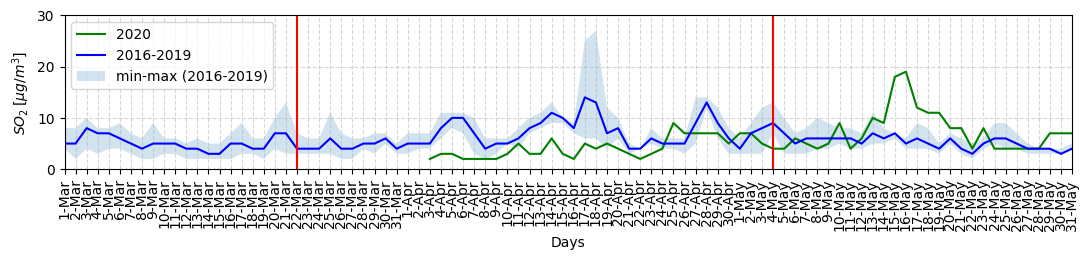

In [3]:
plt.figure(figsize=(13,2))

plt.xlabel('Days')
plt.ylabel('$SO_{2} \: [μg/m^{3}$]')

x=[]
for i in df['SO220']:
  if i==0:
    x+=[None]
  else:
    x+=[i]

plt.plot(df['DAY'], x, 'g', label='2020')
plt.plot(df['DAY'], df['SO2MEAN'], 'b', label='2016-2019')
plt.fill_between(df['DAY'], df['SO2MIN'], df['SO2MAX'], alpha=0.2, label='min-max (2016-2019)')
plt.legend()

plt.xlim(df.loc[0]['DAY'] , df.loc[91]['DAY'])
plt.ylim(0,30)

plt.grid(linestyle='--', alpha=0.5)
plt.axvline(x='4-May' ,color='r')
plt.axvline(x='22-Mar' ,color='r')
plt.xticks(rotation=90)

plt.show()

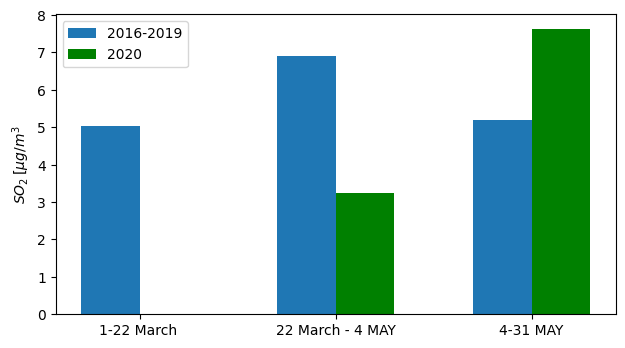

2020
Percentage Difference Pre-Lockdown to Lockdown = 200.00 % 
Percentage Difference Lockdown to Post-Lockdown = 80.47 % 

2016-2019
Percentage Difference Pre-Lockdown to Lockdown = 31.19 % 
Percentage Difference Lockdown to Post-Lockdown = 28.20 % 


In [ ]:
Data=np.array(df['SO220'])
Pre=Data[0:23]
Lock=Data[23:66]
Post=Data[66:91]

Postnew=[]
for c in Post:
  if c!=0:
    Postnew+=[c]

Data=np.array(df['SO2MEAN'])
Pre1=Data[0:23]
Lock1=Data[23:66]
Post1=Data[66:91]


Prev = (np.mean(Pre1),np.mean(Lock1),np.mean(Post1))        # Set of A data
LOCK=   (np.mean(Pre),np.mean(Lock),np.mean(Postnew))    # Set of B data

names= ['1-22 March ', '22 March - 4 MAY', '4-31 MAY']     # Set of names for x asis

fig = plt.figure(figsize=(7,5), dpi=100)
left, bottom, width, height = 0.1, 0.2, 0.8, 0.6
ax = fig.add_axes([left, bottom, width, height])

width = 0.3
ticks = np.arange(len(names))
ax.bar(ticks, Prev, width, label='2016-2019')
ax.bar(ticks + width, LOCK, width, align="center", label='2020', color='green')



ax.set_ylabel('$SO_{2} \: [μg/m^{3}$')
ax.set_xticks(ticks + width/2)
ax.set_xticklabels(names)

ax.legend(loc='best')
plt.show()


print('2020')
P1=perc(np.mean(Pre), np.mean(Lock))
P2=perc(np.mean(Lock),np.mean(Postnew))
print('Percentage Difference Pre-Lockdown to Lockdown = %.2f %% ' %(P1))
print('Percentage Difference Lockdown to Post-Lockdown = %.2f %% ' %(P2))


print()
print('2016-2019')
P11=perc(np.mean(Pre1), np.mean(Lock1))
P22=perc(np.mean(Lock1),np.mean(Post1))
print('Percentage Difference Pre-Lockdown to Lockdown = %.2f %% ' %(P11))
print('Percentage Difference Lockdown to Post-Lockdown = %.2f %% ' %(P22))

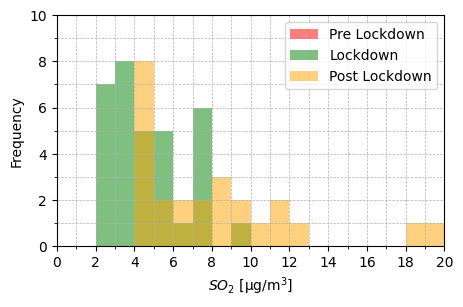

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(5,3))
bins = np.arange(0, 21, 1)

# Plotting histograms
plt.hist(df['SO220'][0:23][df['SO220'][0:23] > 0], bins=bins, alpha=0.5, label='Pre Lockdown', color= 'red')
plt.hist(df['SO220'][23:66][df['SO220'][23:66] > 0], bins=bins, alpha=0.5, label='Lockdown',color= 'green')
plt.hist(df['SO220'][66:91], bins=bins, alpha=0.5, label='Post Lockdown',color='orange')

plt.xlabel('$SO_{2}$ [μg/m$^{3}$]')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.xlim(0,20)
plt.ylim(0,10)

plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(1))
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(1))
plt.xticks(np.arange(0, 22, 2))
plt.grid(linestyle='--', linewidth=0.5)
plt.grid(which='minor', axis='x', linestyle='--', linewidth=0.5)
plt.grid(which='minor', axis='y', linestyle='--', linewidth=0.5)
plt.show()


## **NO**

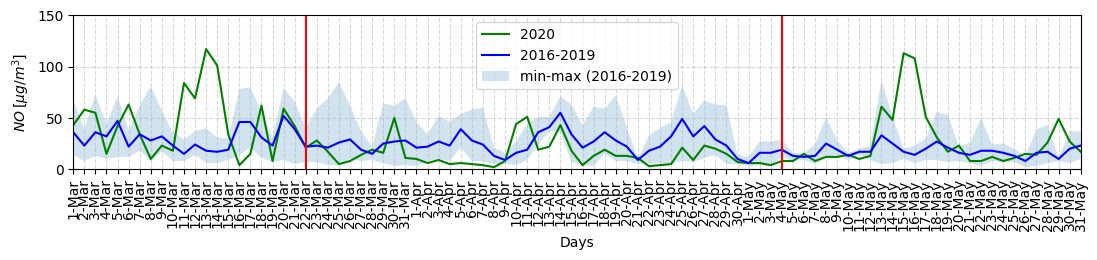

In [5]:
plt.figure(figsize=(13,2))

plt.xlabel('Days')
plt.ylabel('$NO \: [μg/m^{3}$]')

plt.plot(df['DAY'], df['N020'], 'g', label='2020')
plt.plot(df['DAY'], df['NOMEAN'], 'b', label='2016-2019')
plt.fill_between(df['DAY'], df['NOMIN'], df['NOMAX'], alpha=0.2 ,label='min-max (2016-2019)')
plt.legend()

plt.xlim(df.loc[0]['DAY'] , df.loc[91]['DAY'])
plt.ylim(0,150)
plt.grid(linestyle='--', alpha=0.5)
plt.axvline(x='4-May' ,color='r')
plt.axvline(x='22-Mar' ,color='r')
plt.xticks(rotation=90)

plt.show()

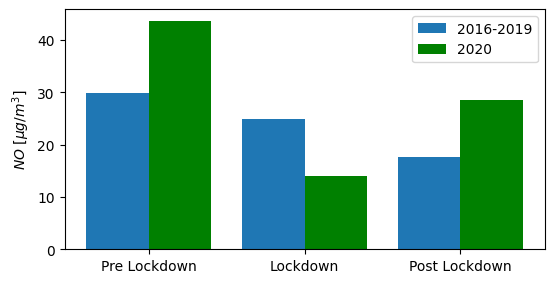

2020
Percentage Difference Pre-Lockdown to Lockdown = 102.69 % 
Difference Pre-Lockdown to Lockdown = 29.65  
Percentage Difference Lockdown to Post-Lockdown = 68.13 % 
Difference Lockdown to Post-Lockdown = -14.51  

2016-2019
Percentage Difference Pre-Lockdown to Lockdown = 18.63 % 
Difference Pre-Lockdown to Lockdown = 5.10 % 
Percentage Difference Lockdown to Post-Lockdown = 34.24 % 
Difference Lockdown to Post-Lockdown = 7.25 % 


In [ ]:
Data=np.array(df['N020'])
Pre=Data[0:23]
Lock=Data[23:66]
Post=Data[66:91]

Data=np.array(df['NOMEAN'])
Pre1=Data[0:23]
Lock1=Data[23:66]
Post1=Data[66:91]

Prev = (np.mean(Pre1),np.mean(Lock1),np.mean(Post1))        # Set of A data
LOCK=   (np.mean(Pre),np.mean(Lock),np.mean(Post))    # Set of B data

names= ['Pre Lockdown', 'Lockdown', 'Post Lockdown']     # Set of names for x asis

fig = plt.figure(figsize=(6,4), dpi=100)
left, bottom, width, height = 0.1, 0.2, 0.8, 0.6
ax = fig.add_axes([left, bottom, width, height])

width = 0.4
ticks = np.arange(len(names))
ax.bar(ticks, Prev, width, label='2016-2019')
ax.bar(ticks + width, LOCK, width, align="center", label='2020', color='green')


ax.set_ylabel('$NO$ $[μg/m^{3}]$')
ax.set_xticks(ticks + width/2)
ax.set_xticklabels(names)

ax.legend(loc='best')
plt.show()

print('2020')
P1=perc(np.mean(Pre), np.mean(Lock))
P2=perc(np.mean(Lock),np.mean(Post))
print('Percentage Difference Pre-Lockdown to Lockdown = %.2f %% ' %(P1))
print('Difference Pre-Lockdown to Lockdown = %.2f  ' %(np.mean(Pre)- np.mean(Lock)))
print('Percentage Difference Lockdown to Post-Lockdown = %.2f %% ' %(P2))
print('Difference Lockdown to Post-Lockdown = %.2f  ' %(np.mean(Lock) -np.mean(Post)))

print()
print('2016-2019')
P11=perc(np.mean(Pre1), np.mean(Lock1))
P22=perc(np.mean(Lock1),np.mean(Post1))
print('Percentage Difference Pre-Lockdown to Lockdown = %.2f %% ' %(P11))
print('Difference Pre-Lockdown to Lockdown = %.2f %% ' %(np.mean(Pre1) - np.mean(Lock1)))
print('Percentage Difference Lockdown to Post-Lockdown = %.2f %% ' %(P22))
print('Difference Lockdown to Post-Lockdown = %.2f %% ' %(np.mean(Lock1) -np.mean(Post1)))

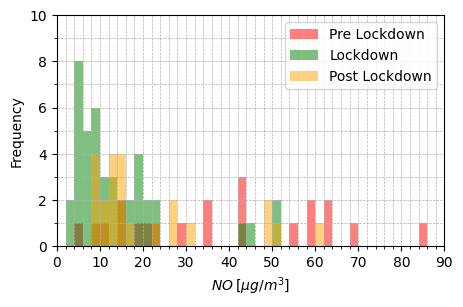

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,3))
bins = np.arange(0, 102, 2)

plt.hist(df['N020'][0:23], bins=bins, alpha=0.5, label='Pre Lockdown', color= 'red')
plt.hist(df['N020'][23:66], bins=bins, alpha=0.5, label='Lockdown',color= 'green')
plt.hist(df['N020'][66:91], bins=bins, alpha=0.5, label='Post Lockdown',color='orange')

plt.xlabel('$NO \: [μg/m^{3}$]')
plt.ylabel('Frequency')
plt.legend()
plt.xlim(1,90)
plt.ylim(0,10)

plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(2))
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(1))
plt.xticks(np.arange(0, 100, 10))
plt.grid(which='minor', axis='x', linestyle='--', linewidth=0.5)
plt.grid(which='minor', axis='y', linestyle='--', linewidth=0.5)
plt.grid(linestyle='--', linewidth=0.5)
plt.show()


## **$NO_{2}$**

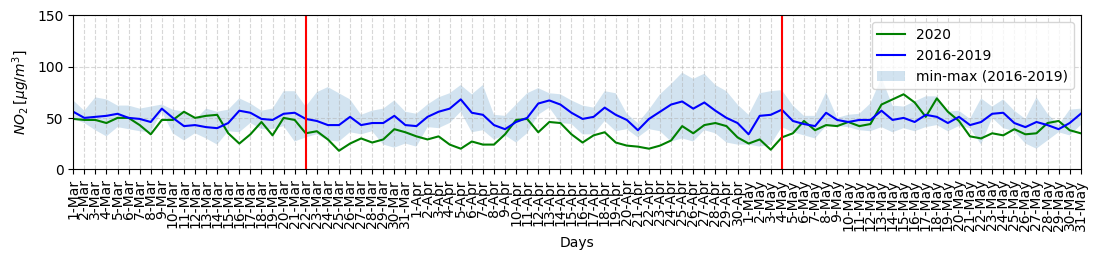

In [6]:
plt.figure(figsize=(13,2))

plt.xlabel('Days')
plt.ylabel('$NO_{2} \: [μg/m^{3}$]')

plt.plot(df['DAY'], df['N0220'], 'g', label='2020')
plt.plot(df['DAY'], df['NO2MEAN'], 'b', label='2016-2019')
plt.fill_between(df['DAY'], df['NO2MIN'], df['NO2MAX'], alpha=0.2, label='min-max (2016-2019)')

plt.legend()

plt.xlim(df.loc[0]['DAY'] , df.loc[91]['DAY'])
plt.ylim(0,150)
plt.grid(linestyle='--', alpha=0.5)
plt.axvline(x='4-May' ,color='r')
plt.axvline(x='22-Mar' ,color='r')
plt.xticks(rotation=90)

plt.show()

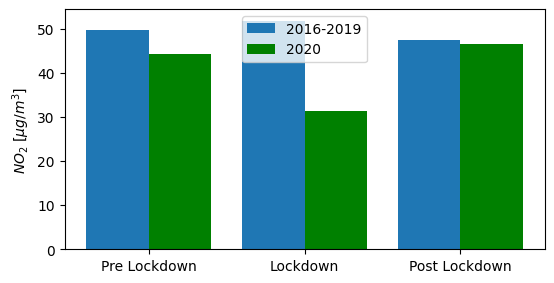

2020
Percentage Difference Pre-Lockdown to Lockdown = 33.92 % 
Difference Pre-Lockdown to Lockdown = 12.82  
Percentage Difference Lockdown to Post-Lockdown = 38.74 % 
Difference Lockdown to Post-Lockdown = -15.08  

2016-2019
Percentage Difference Pre-Lockdown to Lockdown = 4.31 % 
Difference Pre-Lockdown to Lockdown = -2.19 % 
Percentage Difference Lockdown to Post-Lockdown = 8.61 % 
Difference Lockdown to Post-Lockdown = 4.28 % 


In [ ]:
Data=np.array(df['N0220'])
Pre=Data[0:23]
Lock=Data[23:66]
Post=Data[66:91]

Data=np.array(df['NO2MEAN'])
Pre1=Data[0:23]
Lock1=Data[23:66]
Post1=Data[66:91]

Prev = (np.mean(Pre1),np.mean(Lock1),np.mean(Post1))        # Set of A data
LOCK=   (np.mean(Pre),np.mean(Lock),np.mean(Post))    # Set of B data

names= ['Pre Lockdown', 'Lockdown', 'Post Lockdown']     # Set of names for x asis

fig = plt.figure(figsize=(6,4), dpi=100)
left, bottom, width, height = 0.1, 0.2, 0.8, 0.6
ax = fig.add_axes([left, bottom, width, height])

width = 0.4
ticks = np.arange(len(names))
ax.bar(ticks, Prev, width, label='2016-2019')
ax.bar(ticks + width, LOCK, width, align="center", label='2020', color='green')

ax.set_ylabel('$NO_{2}$ $[μg/m^{3}]$')
ax.set_xticks(ticks + width/2)
ax.set_xticklabels(names)

ax.legend(loc='best')
plt.show()

print('2020')
P1=perc(np.mean(Pre), np.mean(Lock))
P2=perc(np.mean(Lock),np.mean(Post))
print('Percentage Difference Pre-Lockdown to Lockdown = %.2f %% ' %(P1))
print('Difference Pre-Lockdown to Lockdown = %.2f  ' %(np.mean(Pre)- np.mean(Lock)))
print('Percentage Difference Lockdown to Post-Lockdown = %.2f %% ' %(P2))
print('Difference Lockdown to Post-Lockdown = %.2f  ' %(np.mean(Lock) -np.mean(Post)))

print()
print('2016-2019')
P11=perc(np.mean(Pre1), np.mean(Lock1))
P22=perc(np.mean(Lock1),np.mean(Post1))
print('Percentage Difference Pre-Lockdown to Lockdown = %.2f %% ' %(P11))
print('Difference Pre-Lockdown to Lockdown = %.2f %% ' %(np.mean(Pre1) - np.mean(Lock1)))
print('Percentage Difference Lockdown to Post-Lockdown = %.2f %% ' %(P22))
print('Difference Lockdown to Post-Lockdown = %.2f %% ' %(np.mean(Lock1) -np.mean(Post1)))

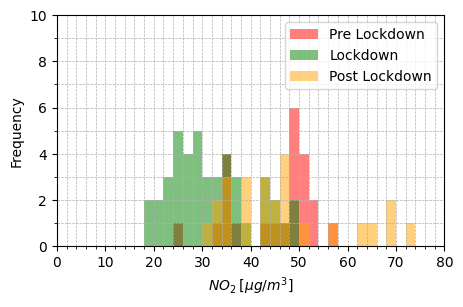

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,3))
bins = np.arange(0, 80, 2)

plt.hist(df['N0220'][0:23], bins=bins, alpha=0.5, label='Pre Lockdown', color= 'red')
plt.hist(df['N0220'][23:66], bins=bins, alpha=0.5, label='Lockdown',color= 'green')
plt.hist(df['N0220'][66:91], bins=bins, alpha=0.5, label='Post Lockdown',color='orange')

plt.xlabel('$NO_{2} \: [μg/m^{3}$]')
plt.ylabel('Frequency')
plt.legend()
plt.xlim(1,80)
plt.ylim(0,10)

plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(2))
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(1))
plt.xticks(np.arange(0, 90, 10))
plt.grid(which='minor', axis='x', linestyle='--', linewidth=0.5)
plt.grid(which='minor', axis='y', linestyle='--', linewidth=0.5)
plt.grid(linestyle='--', linewidth=0.5)
plt.show()


## **$PM_{2.5}$**

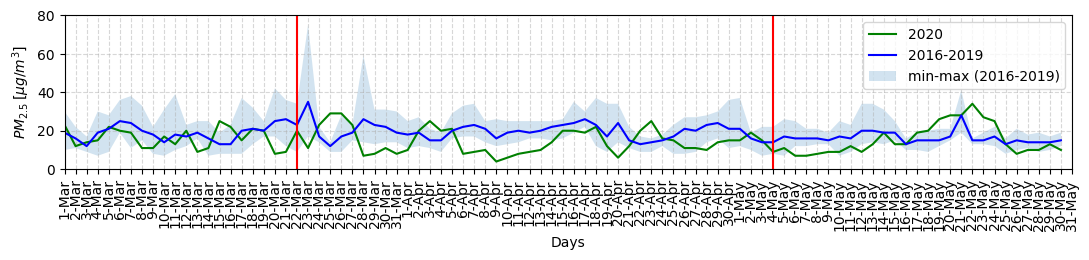

In [8]:
plt.figure(figsize=(13,2))

plt.xlabel('Days')
plt.ylabel('$PM_{2.5} \: [μg/m^{3}$]')


plt.plot(df['DAY'], df['PM252O'], 'g', label='2020')
plt.plot(df['DAY'], df['PM25MEAN'], 'b', label='2016-2019')
plt.fill_between(df['DAY'],df['PM25MIN'], df['PM25MAX'], alpha=0.2, label='min-max (2016-2019)')

plt.legend()

plt.xlim(df.loc[0]['DAY'] , df.loc[91]['DAY'])
plt.ylim(0,80)
plt.grid(linestyle='--', alpha=0.5)
plt.axvline(x='4-May' ,color='r')
plt.axvline(x='22-Mar' ,color='r')
plt.xticks(rotation=90)

plt.show()

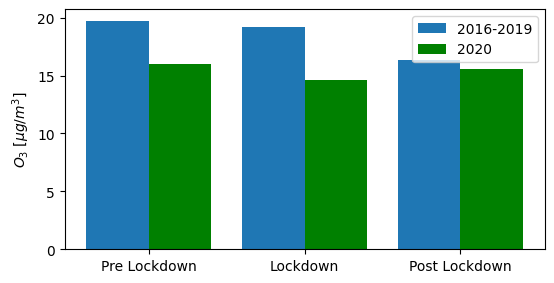

2020
Percentage Difference Pre-Lockdown to Lockdown = 8.96 % 
Difference Pre-Lockdown to Lockdown = 1.37  
Percentage Difference Lockdown to Post-Lockdown = 6.43 % 
Difference Lockdown to Post-Lockdown = -0.97  

2016-2019
Percentage Difference Pre-Lockdown to Lockdown = 2.72 % 
Difference Pre-Lockdown to Lockdown = 0.53 % 
Percentage Difference Lockdown to Post-Lockdown = 16.02 % 
Difference Lockdown to Post-Lockdown = 2.85 % 


In [ ]:
Data=np.array(df['PM252O'])
Pre=Data[0:23]
Lock=Data[23:66]
Post=Data[66:91]

Postnew=[]
for c in Post:
  if c!=0:
    Postnew+=[c]

Data=np.array(df['PM25MEAN'])
Pre1=Data[0:23]
Lock1=Data[23:66]
Post1=Data[66:91]

Prev = (np.mean(Pre1),np.mean(Lock1),np.mean(Post1))        # Set of A data
LOCK=   (np.mean(Pre),np.mean(Lock),np.mean(Postnew))    # Set of B data

names= ['Pre Lockdown', 'Lockdown', 'Post Lockdown']     # Set of names for x asis

fig = plt.figure(figsize=(6,4), dpi=100)
left, bottom, width, height = 0.1, 0.2, 0.8, 0.6
ax = fig.add_axes([left, bottom, width, height])

width = 0.4
ticks = np.arange(len(names))
ax.bar(ticks, Prev, width, label='2016-2019')
ax.bar(ticks + width, LOCK, width, align="center", label='2020', color='green')

ax.set_ylabel('$O_{3}$ $[μg/m^{3}]$')
ax.set_xticks(ticks + width/2)
ax.set_xticklabels(names)

ax.legend(loc='best')
plt.show()

print('2020')
P1=perc(np.mean(Pre), np.mean(Lock))
P2=perc(np.mean(Lock),np.mean(Post))
print('Percentage Difference Pre-Lockdown to Lockdown = %.2f %% ' %(P1))
print('Difference Pre-Lockdown to Lockdown = %.2f  ' %(np.mean(Pre)- np.mean(Lock)))
print('Percentage Difference Lockdown to Post-Lockdown = %.2f %% ' %(P2))
print('Difference Lockdown to Post-Lockdown = %.2f  ' %(np.mean(Lock) -np.mean(Post)))

print()
print('2016-2019')
P11=perc(np.mean(Pre1), np.mean(Lock1))
P22=perc(np.mean(Lock1),np.mean(Post1))
print('Percentage Difference Pre-Lockdown to Lockdown = %.2f %% ' %(P11))
print('Difference Pre-Lockdown to Lockdown = %.2f %% ' %(np.mean(Pre1) - np.mean(Lock1)))
print('Percentage Difference Lockdown to Post-Lockdown = %.2f %% ' %(P22))
print('Difference Lockdown to Post-Lockdown = %.2f %% ' %(np.mean(Lock1) -np.mean(Post1)))

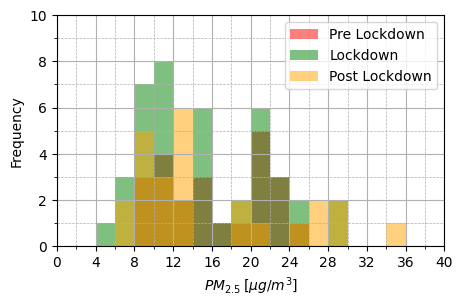

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,3))
bins = np.arange(0, 42, 2)

plt.hist(df['PM252O'][0:23], bins=bins, alpha=0.5, label='Pre Lockdown', color= 'red')
plt.hist(df['PM252O'][23:66], bins=bins, alpha=0.5, label='Lockdown',color= 'green')
plt.hist(df['PM252O'][66:91], bins=bins, alpha=0.5, label='Post Lockdown',color='orange')

plt.xlabel('$PM_{2.5} \: [μg/m^{3}$]')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.xlim(0,40)
plt.ylim(0,10)

plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(2))
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(1))
plt.xticks(np.arange(0, 44, 4))
plt.grid(which='minor', axis='x', linestyle='--', linewidth=0.5)
plt.grid(which='minor', axis='y', linestyle='--', linewidth=0.5)
plt.show()
